#5 Наследования. Работа с интернетом. Картинки

#5.1 Наследования

Иногда бывает нужно модифицировать класс, некоторые атрибуты которого хочется слегка поменять, а некоторые добавить, при этом классы выполняют схожие функции.

Для этих целей есть механизм наследований.

In [1]:
class Animal:
    emoji = u'🐾'
    def showMe(self):
        print self.emoji

class Boar(Animal):
    emoji = u'🐗'

class DomesticAnimal(Animal):
    howISay = ''
    def sayHello(self):
        print self.howISay
        
class Pig(DomesticAnimal):
    howISay = 'On\'k-On\'k'
    emoji = u'🐷'
    
class Cow(DomesticAnimal):
    howISay = 'Muuu'
    emoji = u'🐮'

    
boar = Boar()
boar.showMe()
    
pig = Pig()
pig.sayHello()
pig.showMe()

cow = Cow()
cow.sayHello()
cow.showMe()

🐗
On'k-On'k
🐷
Muuu
🐮


#5.2 Парсинг html

Для сохранения html страниц будем использовать метод urlopen из модуля urllib2, а для парсинга html-страниц будем использовать модуль HTMLParser.

In [2]:
from urllib2 import urlopen
from HTMLParser import HTMLParser

Откроем страничку с фотографиями победителей одного из квестов за произвольный месяц.

In [3]:
conn = urlopen('http://phobia.ru/winners/138/2015/4')
html = conn.read()
print html

<!DOCTYPE html>
<html prefix="og: http://ogp.me/ns#" class="no-js" xmlns="http://www.w3.org/1999/html">
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">
        <title>
    
        Команды - Апрель 2015 | Квесты Клаустрофобии
    
</title>
        <meta name="description" content="Фотографии победителей квеста Ночной кошмар за Апрель 2015 в городе Москва. Квесты Клаустрофобии - невероятные приключения!">
        
        <meta name="viewport" content="width=900, maximum-scale=0.8, minimum-scale=0.2, user-scalable=yes" />

        <link rel="stylesheet" href="/static/CACHE/css/2545fb3940dc.css" type="text/css" />

        
        <link href='http://fonts.googleapis.com/css?family=Roboto:400,500&subset=latin,cyrillic-ext,cyrillic' rel='stylesheet' type='text/css'>

        <link rel="stylesheet" href="/static/CACHE/css/30946ce3fded.css" type="text/css" />

        <script src="/static/js/vendor/modernizr-2.7.1.min.js"></script>
   

HTMLParser разбивает тэги на пары. С его помощью мы сможем понимать внутри какого тэга находимся.

Мы переопределим методы для анализа handle_starttag, handle_endtag, handle_data так, как нужно нам, оставив при этом работу парсера корректной. Нам помогут наследования, о которых мы говорили вначале.

In [4]:
class MyHTMLParser(HTMLParser):
    def handle_starttag(self, tag, attrs):
        print 'Start tag: Tag: ', tag, 'Attrs: ', attrs
    def handle_endtag(self, tag):
        print 'End tag: Tag: ', tag
    def handle_data(self, data):
        print 'Data:', data

Для парсинга html нужно вызвать метод feed

In [5]:
parser = MyHTMLParser()
parser.feed(html)

Data: 

Start tag: Tag:  html Attrs:  [('prefix', 'og: http://ogp.me/ns#'), ('class', 'no-js'), ('xmlns', 'http://www.w3.org/1999/html')]
Data: 
    
Start tag: Tag:  head Attrs:  []
Data: 
        
Start tag: Tag:  meta Attrs:  [('charset', 'utf-8')]
Data: 
        
Start tag: Tag:  meta Attrs:  [('http-equiv', 'X-UA-Compatible'), ('content', 'IE=edge')]
Data: 
        
Start tag: Tag:  title Attrs:  []
Data: 
    
        Команды - Апрель 2015 | Квесты Клаустрофобии
    

End tag: Tag:  title
Data: 
        
Start tag: Tag:  meta Attrs:  [('name', 'description'), ('content', '\xd0\xa4\xd0\xbe\xd1\x82\xd0\xbe\xd0\xb3\xd1\x80\xd0\xb0\xd1\x84\xd0\xb8\xd0\xb8 \xd0\xbf\xd0\xbe\xd0\xb1\xd0\xb5\xd0\xb4\xd0\xb8\xd1\x82\xd0\xb5\xd0\xbb\xd0\xb5\xd0\xb9 \xd0\xba\xd0\xb2\xd0\xb5\xd1\x81\xd1\x82\xd0\xb0 \xd0\x9d\xd0\xbe\xd1\x87\xd0\xbd\xd0\xbe\xd0\xb9 \xd0\xba\xd0\xbe\xd1\x88\xd0\xbc\xd0\xb0\xd1\x80 \xd0\xb7\xd0\xb0 \xd0\x90\xd0\xbf\xd1\x80\xd0\xb5\xd0\xbb\xd1\x8c 2015 \xd0\xb2 \xd0\xb3\xd0\xbe\x

В конечном счете нас будут интересовать фото победителей. Для этого можно заметить, что все фото находятся внутри тэга a со значением атрибута class winner_photo в атрибуте style.

In [6]:
class MyHTMLParser(HTMLParser):
    photoLinks = []
    def handle_starttag(self, tag, attrs):
        if tag == 'a' and ('class', 'winner_photo') in attrs:
            for attr in attrs:
                if attr[0] == 'style':
                    self.photoLinks.append(attr[1][len('backroung-image: url(\'\''):-3])
            

In [7]:
parser = MyHTMLParser()
parser.feed(html)

Теперь можно скачать все фотографии. 
Для работы с изображениями можно использовать библиотеку skimage.
Если она у вас не установлена, для установки можно вызвать, например, команду pip install skimage

Следующая строчка нужна для отображения картинок прямо в ipython notebook

In [8]:
%matplotlib inline

In [9]:
from skimage import io

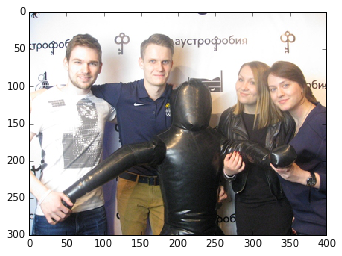

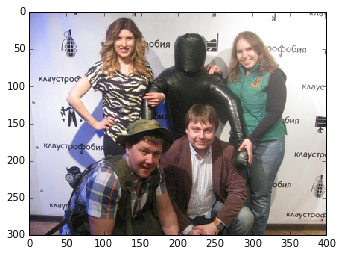

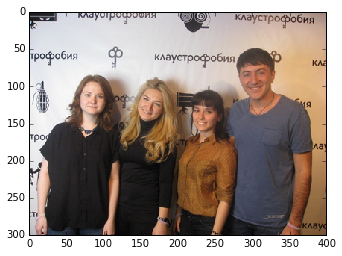

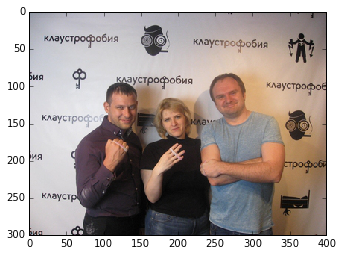

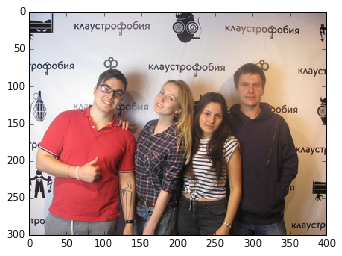

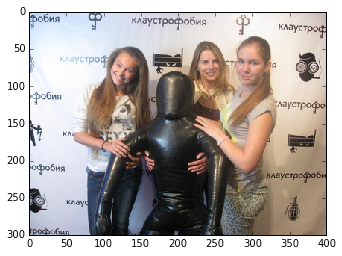

In [10]:
i = 0
for photoLink in parser.photoLinks:
    i += 1
    img = io.imread('http://phobia.ru'+photoLink)
    io.imshow(img)
    io.show()
    if i > 5:
        break

Аналогичный код для сохранения фото на компьютер.

Из ipython notebook можно запускать команды не только для python. Следующая создает папку photo.

In [14]:
!mkdir photo

In [15]:
i = 0
for photoLink in parser.photoLinks:
    i += 1
    img = io.imread('http://phobia.ru'+photoLink)
    io.imsave('photo/' + '%03d' % i + '.jpg', img)
    if i > 5:
        break